# EXOTIC FRUIT CLASSIFICATION 
*Fourth Master AI Engineering project*

## Import Libraries and Dataset

* The Python packages I used in this projects are in requirements.txt file
* Dataset is stored in the 'Data' folder
* I renamed the columns for two reasons:
    - I need to translate Italian column names into English ones
    - I didn't want measurement units and ranges in the column names

In [1]:
# Import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import pygwalker as pyg

from src.preprocessing_and_viz import handle_duplicates, plot_feature_distribution, scatter_plot, plot_feature_kde, feature_scaling
from src.ml_functions import data_split, knn_optimization, viz_grid_search_res, evaluate_model, cross_validation_model
from src.ml_functions import plot_line_accuracy_log_loss, plot_bar_metrics, plot_violin_metric

In [2]:
# Import Dataset

df = pd.read_csv("Data/Fruits_Dataset.csv")

df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88


In [3]:
# Renaming columns

new_columns = [
    'Fruit',
    'Weight',
    'Average diameter',
    'Average length',
    'Peel hardness',
    'Sweetness',
]

df.columns = new_columns

df.columns

Index(['Fruit', 'Weight', 'Average diameter', 'Average length',
       'Peel hardness', 'Sweetness'],
      dtype='object')

## Statistics Information

Useful information I got:
* Shape: (500,6)
* `Fruit` is the target column. There are 5 options: Apple, Banana, Orange, Grape, Kiwi
* 5 numerical features with continous values (float64)
* Statistics:
    - mean values and ranges are one order of magnitude different, I will implement normalization/standardization
    - Maximum value for Peel hardness should have been 10, but it's clearly higher (13.72). Strange!
    - it seems there are no missing values 

In [7]:
# Shape and Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fruit             500 non-null    object 
 1   Weight            500 non-null    float64
 2   Average diameter  500 non-null    float64
 3   Average length    500 non-null    float64
 4   Peel hardness     500 non-null    float64
 5   Sweetness         500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [8]:
# Statistics

df.describe()

,Weight,Average diameter,Average length,Peel hardness,Sweetness
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,47.313440,86.573100,5.298620,7.437640,3.593220
std,26.768797,64.293403,2.641993,1.812548,1.264899
min,8.570000,7.530000,1.150000,3.070000,1.250000
25%,24.797500,50.510000,2.672500,6.152500,2.570000
50%,42.380000,70.450000,5.670000,7.340000,3.535000
75%,68.080000,88.852500,7.455000,8.615000,4.465000
max,111.210000,299.890000,11.140000,13.720000,6.950000


In [4]:
# Rename Target values and see how they are distributed

target_value_names = {
    'Mela' : 'Apple',
    'Banana' : 'Banana',
    'Arancia' : 'Orange',
    'Uva' : 'Grape',
    'Kiwi' : 'Kiwi'
}

df['Fruit'] = df['Fruit'].map(lambda x: target_value_names[x])

df['Fruit'].value_counts()

Fruit
Apple     100
Banana    100
Orange    100
Grape     100
Kiwi      100
Name: count, dtype: int64

## Preprocessing

* No duplicates in the dataset. Shape is still (500,6)
* No missing values in the dataset.

In [5]:
# Check for duplicates

df_cleaned = handle_duplicates(df)

No duplicates found!


In [8]:
# Check for missing values

df_cleaned.isna().sum()

Fruit               0
Weight              0
Average diameter    0
Average length      0
Peel hardness       0
Sweetness           0
dtype: int64

## Data Visualization

Feature distribution without comparison with target column:
* Weight: as expected, it is a negatively skewed distribution with high max value (111.21)
* Average diameter: it is clear we have smaller fruits, so distribution is negatively skewed, with higher values come from Banana target
* Average length: its distribution has two peaks, sign of fruits with well separated lengths
* Peel hardness: has a almost normal distribution with a couple of possible outliers, median and mean are quite the same
* Sweetness: has a almost normal distribution, median and mean are quite the same

Feature distribution and scatter plot and comparison with target column:
* Weight, Average diameter, Average length: each fruit follows distributions that were expected, interesting how Apple, Orange and Kiwi have almost the same distribution for Average diameter
* Peel hardness: each fruit seems to follow a normal distribution
* Sweetness: Orange, Grape and Kiwi reach higher values, as expected

Scatter plot to see how features are distributed according to target column:
* Weight vs Average diameter: it is possible to clearly see two clusters for Banana and Grape. Maybe, Apple, Orange and Kiwi will be more difficult to classify
* Average length vs Average diameter: this plot emphasizes what said before 
* Peel hardness vs Weight: lighter fruits have higher Peel hardness values
* Sweetness vs Average diameter: smaller fruits have higher Sweetness values
* Peel hardness vs Sweetness: Banana has lowest Sweetness values and well distributed Peel hardness values. Orange, instead, had higher Sweetness values and lowest Peel hardness values

In [28]:
# Feature distribution among ['Weight', 'Average diameter', 'Average length', 'Peel hardness', 'Sweetness']

feature_to_viz = 'Weight'

plot_feature_distribution(df_cleaned, feature_to_viz, comparison=False)

In [33]:
# Feature distribution among ['Weight', 'Average diameter', 'Average length', 'Peel hardness', 'Sweetness']
# and comparison with TARGET 'Fruit' 

feature_to_viz = 'Sweetness'

plot_feature_distribution(df_cleaned, feature_to_viz, comparison='Fruit')

In [39]:
# Scatter plot among ['Weight', 'Average diameter', 'Average length', 'Peel hardness', 'Sweetness']
# and comparison with TARGET 'Fruit' 

feature_x = 'Sweetness'
feature_y = 'Average diameter'

scatter_plot(df_cleaned, feature_x, feature_y, target='Fruit')

In [ ]:
# Visualization Dashboard using PYGWALKER, you can see interactively the last plots
# You can save the json file for the configuration you want to visualize and make other people see it using this code:
# pyg.walk(df_cleaned, spec="Images/pygwalker_config_1.json")


pyg.walk(df_cleaned)

## Feature Engineering 

Two options:
* Feature scaling only with MinMaxScaler method: 
    - it allows me to have all features in the same range of values [0,1]
    -  intuitive and fast to implement
* Feature scaling only with StandardScaler method:
    - it's useful to get stable and robust distributions from a statistically point of view, bringing all features to mean 0 and std 1
    - in this dataset, features are close, or at least quite close, to normal distribution

**My decision** is to use *StandardScaler* because:
1. in this dataset, there are feature that should be normally distributed. All of them are properties of some fruits, so increasing the numebr of instances I think they will follow a Gaussian distribution
2. MinMax scaler compresses data to a fixed range, it could cause a loss of significant information

In [12]:
# Feature scaling with MinMaxScaler method

df_minmax_transformed = feature_scaling(df_cleaned, method = 'MinMax')
df_minmax_transformed.describe().map(lambda x: f"{x:.2f}")

,Weight,Average diameter,Average length,Peel hardness,Sweetness
count,500.00,500.00,500.00,500.00,500.00
mean,0.38,0.27,0.42,0.41,0.41
std,0.26,0.22,0.26,0.17,0.22
min,0.00,0.00,0.00,0.00,0.00
25%,0.16,0.15,0.15,0.29,0.23
50%,0.33,0.22,0.45,0.40,0.40
75%,0.58,0.28,0.63,0.52,0.56
max,1.00,1.00,1.00,1.00,1.00


In [6]:
# Feature scaling with StandardScaler method

df_standard_transformed = feature_scaling(df_cleaned, method = 'Standard')
df_standard_transformed.describe().map(lambda x: f'{x:.2f}')

,Weight,Average diameter,Average length,Peel hardness,Sweetness
count,500.00,500.00,500.00,500.00,500.00
mean,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.23,-1.57,-2.41,-1.85
25%,-0.84,-0.56,-0.99,-0.71,-0.81
50%,-0.18,-0.25,0.14,-0.05,-0.05
75%,0.78,0.04,0.82,0.65,0.69
max,2.39,3.32,2.21,3.47,2.66


## Visualization after feature engineering

This is a section to visualize the transformed data using:
* distplot with normal distribution, with also histogram and rug plot for each feature
* distribution with histogram and box plot for each feature, including meand and std values
* scatter plots with target column comparison

In [9]:
# Distplot with Normal Distribution among ['Weight', 'Average diameter', 'Average length', 'Peel hardness', 'Sweetness']]

feature_to_viz = 'Peel hardness'

plot_feature_kde(df_standard_transformed, feature_to_viz, bin=0.2)

In [10]:
# Feature distribution among ['Weight', 'Average diameter', 'Average length', 'Peel hardness', 'Sweetness']

feature_to_viz = 'Sweetness'

plot_feature_distribution(df_standard_transformed, feature_to_viz, comparison=False)

In [7]:
# Scatter plot among ['Weight', 'Average diameter', 'Average length', 'Peel hardness', 'Sweetness']
# and comparison with TARGET 'Fruit' 

feature_x = 'Sweetness'
feature_y = 'Average diameter'

scatter_plot(df_standard_transformed, feature_x, feature_y, target='Fruit')

## Saving transformed dataset

In [13]:
# Saving dataset transformed with StandardScaler

df_standard_transformed.to_csv("Data/Fruits_Dataset_Preprocessed_Standard.csv", index=False)

In [14]:
# Saving dataset transformed with MinMaxScaler

df_minmax_transformed.to_csv("Data/Fruits_Dataset_Preprocessed_MinMax.csv", index=False)

##  K-Nearest Neighbors (KNN) implementation and Results

Evaluate KNN algorithms using a train_test_split and a GridSearchCV optimization for the number of neighbours:
1. splitting the dataset in a stratify way
2. optimization procedure with GridSearchCV to find the best KNN model with the number of neighbours that reaches the highest accuracy score in validation test
3. `Results`:
    * Error Bar Plot
    * Classification Report and Confusion Matrix

Evaluate KNN algorithms using a stratified K-folds cross-validation for each number of neighbours in [1,20]

In [2]:
# Import Transformed Dataset

df_standard_transformed = pd.read_csv("Data/Fruits_Dataset_Preprocessed_Standard.csv")
df_standard_transformed.head()

,Weight,Average diameter,Average length,Peel hardness,Sweetness,Fruit
0,1.461616,0.048372,1.284930,1.199712,-0.936364,Apple
1,1.131798,-0.204317,0.451391,-0.131240,0.219035,Apple
2,1.295211,-0.076493,0.417292,0.912536,-0.564420,Apple
3,0.711112,-0.776332,0.561267,0.426545,-0.825572,Apple
4,0.352126,-0.169442,0.182386,0.945671,0.226949,Apple


In [3]:
# Splitting dataset

label = 'Fruit'

X_train, X_test, y_train, y_test = data_split(df_standard_transformed, label, test_size=0.2)

print("="*40)
print(f"Dataset Shape before splitting: {df_standard_transformed.shape}")
print(f"X train Shape after splitting: {X_train.shape}")
print(f"X test Shape after splitting: {X_test.shape}")
print(f"y train Shape after splitting: {y_train.shape}")
print(f"y test Shape after splitting: {y_test.shape}")
print("="*40)

Dataset Shape before splitting: (500, 6)
X train Shape after splitting: (400, 5)
X test Shape after splitting: (100, 5)
y train Shape after splitting: (400,)
y test Shape after splitting: (100,)


In [4]:
# Check for target distribution in y_test

y_test.value_counts()

Fruit
Grape     20
Apple     20
Kiwi      20
Banana    20
Orange    20
Name: count, dtype: int64

In [5]:
# Optimizing KNN model with GridSearchCV

grid = {
    'n_neighbors' : np.arange(1,20)
}

best_knn_model, results_cv_search = knn_optimization(X_train, y_train, params=grid, k_cv=5, save_res = True)

Best parameters: {'n_neighbors': 6}
Best model: KNeighborsClassifier(n_neighbors=6)
Best accuracy score: 0.925

Results saved...


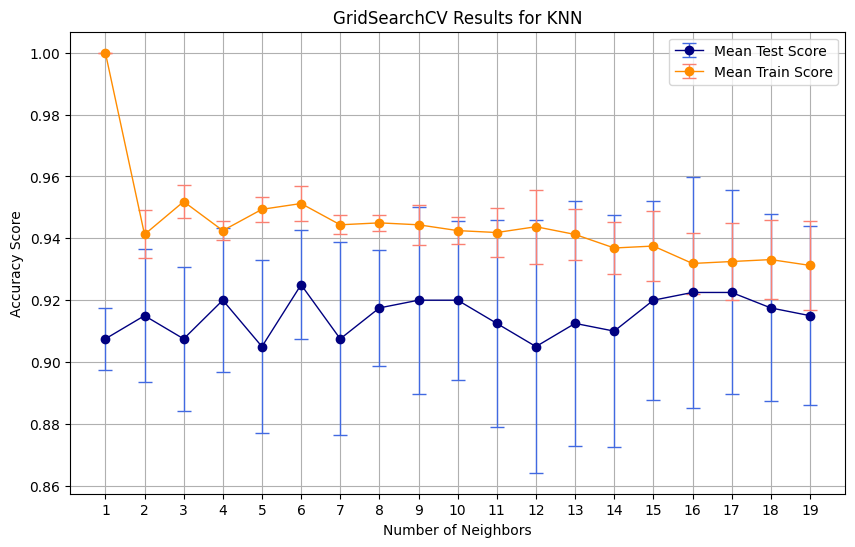

In [7]:
# Visualize results from GridSearchCV with KNN

viz_grid_search_res(results_cv_search)

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

       Apple       0.87      1.00      0.93        20
      Banana       1.00      1.00      1.00        20
       Grape       1.00      1.00      1.00        20
        Kiwi       0.86      0.90      0.88        20
      Orange       0.94      0.75      0.83        20

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

Confusion Matrix:


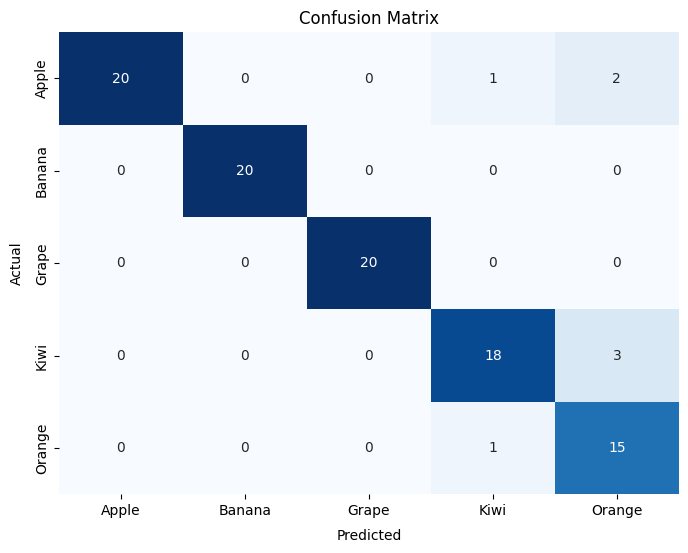

In [6]:
# Model evaluation on Test set

evaluate_model(best_knn_model, X_test, y_test)

In [3]:
# Cross Validation 

results_cv_knn = cross_validation_model(df_standard_transformed, target='Fruit', n_neighbors=6, cv=10)

Training KNN in Fold 1...
Training KNN in Fold 2...
Training KNN in Fold 3...
Training KNN in Fold 4...
Training KNN in Fold 5...
Training KNN in Fold 6...
Training KNN in Fold 7...
Training KNN in Fold 8...
Training KNN in Fold 9...
Training KNN in Fold 10...


In [18]:
# Visualize Cross-Validation results: Scatter Plot for a choosen metric over the folds
# metrics names = accuracy, precision, recall, f1, loss

plot_line_accuracy_log_loss(results_cv_knn, metric='loss')

In [14]:
# Visualize Cross-Validation results: Scatter Plot for a choosen metric over the folds
# metrics names = accuracy, precision, recall, f1, loss

plot_line_accuracy_log_loss(results_cv_knn, metric='accuracy')

In [5]:
# Bar plots to see KNN model performances (mean and std)

plot_bar_metrics(results_cv_knn)

In [4]:
# Violin Plot for a choosen metric among 'accuracy', 'precision', 'recall', 'f1', 'loss' both train and test 

plot_violin_metric(results_cv_knn, 'f1')

## [EXTRA] Machine Learning Models implementation